In [14]:
# TROPICAL TRENDSETTERS
### Robin Mikeal and Jef Hinton

  

In [10]:

# Here's the game plan! we can remove this cell before turning in the assignment.
Describes data distributions using at least three common parameters (e.g. median, mean) and plots KDEs for at least two 1D distributions; provides comments or markdown text explaining these distributions using domain knowledge
Median number of hurricanes per year el nino, la nina, neutral - Jef
common param 2 TBD? - Jef - Boxplots of windspeed by ENSO 
common param 3 TBD? Robin
KDE 1 Wind?  - Robin
KDE 2 Pressure?  - Jef
Linear Regression of pressure vs distance in miles  - Robin

2. Applies at least one parametric and at least one non-parametric method to compare two 1D distributions; explains the significance of the test and what domain implications it has
T test  (parametric)  - Robin
KS test (non-parametric) 1st 10 years of storms vs 2nd 10 years of storms, or el nino vs la nina - Jef 


SyntaxError: invalid decimal literal (3251475234.py, line 2)

In [ ]:
# Overview: 

# We're goint to do some stats, we hope to find some interesting facts 
# <Insert more preamble here> 

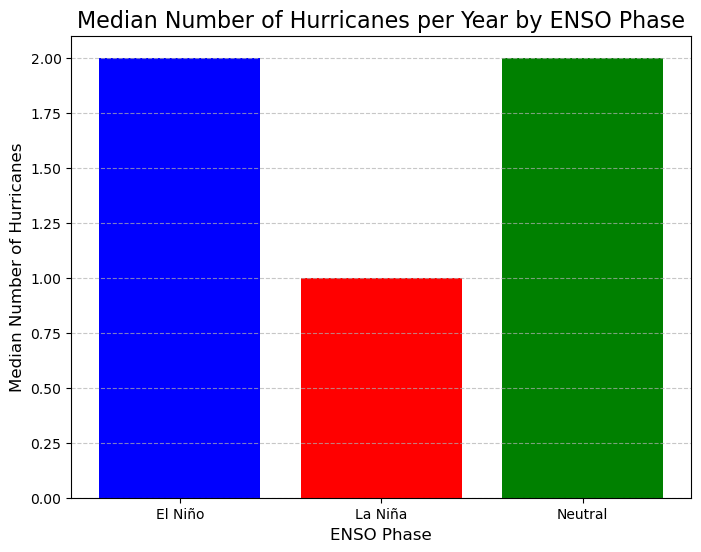

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load
df = pd.read_csv("Tropical_Storm_Dataset_AND_ENSO.csv")

# Count the number of unique hurricanes per year for each ENSO phase
hurricanes_per_year = df.groupby(["Year", "ENSO"])["Name"].nunique().reset_index(name="Hurricane Count")

# Calculate the median number of hurricanes for each ENSO phase
median_hurricanes = hurricanes_per_year.groupby("ENSO")["Hurricane Count"].median().reset_index()

# Plot the median number of hurricanes for each ENSO phase
plt.figure(figsize=(8, 6))
plt.bar(median_hurricanes["ENSO"], median_hurricanes["Hurricane Count"], color=["blue", "red", "green"])
plt.title("Median Number of Hurricanes per Year by ENSO Phase", fontsize=16)
plt.xlabel("ENSO Phase", fontsize=12)
plt.ylabel("Median Number of Hurricanes", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



/tmp/ipykernel_176/3845427877.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="ENSO", y="USA WIND", showfliers=True, palette="Set2", medianprops={"color": "red", "linewidth": 2})


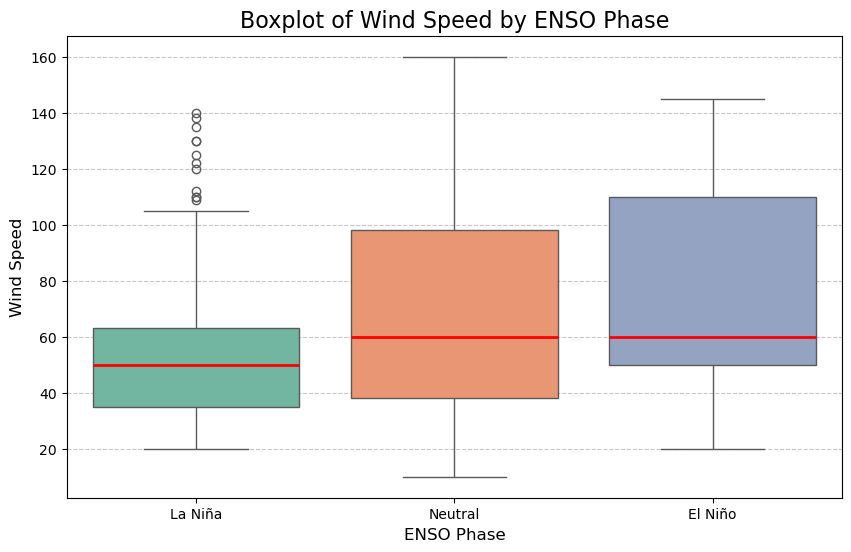

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("Tropical_Storm_Dataset_AND_ENSO.csv")


# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="ENSO", y="USA WIND", showfliers=True, palette="Set2", medianprops={"color": "red", "linewidth": 2})

# Add plot details
plt.title("Boxplot of Wind Speed by ENSO Phase", fontsize=16)
plt.xlabel("ENSO Phase", fontsize=12)
plt.ylabel("Wind Speed", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
This is interesting, so the medians are similar, but neutral has the longest whiskers while la nina has the smallest variance, but alot of outliers. 

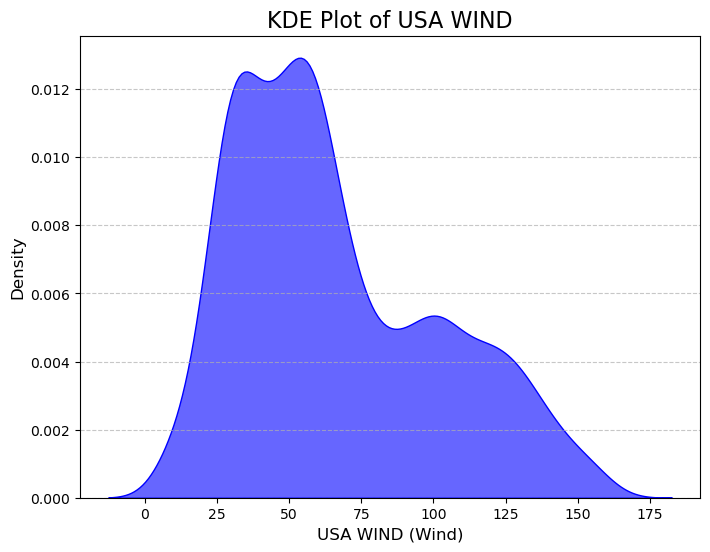

In [6]:
# KDE 1 Wind
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load 
df = pd.read_csv("GEO557Tropical_Storm_Dataset_CLEAN.csv")

# Plot the KDE for 'USA PRES'
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x="USA WIND", fill=True, color="blue", alpha=0.6)
plt.title("KDE Plot of USA WIND", fontsize=16)
plt.xlabel("USA WIND (Wind)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

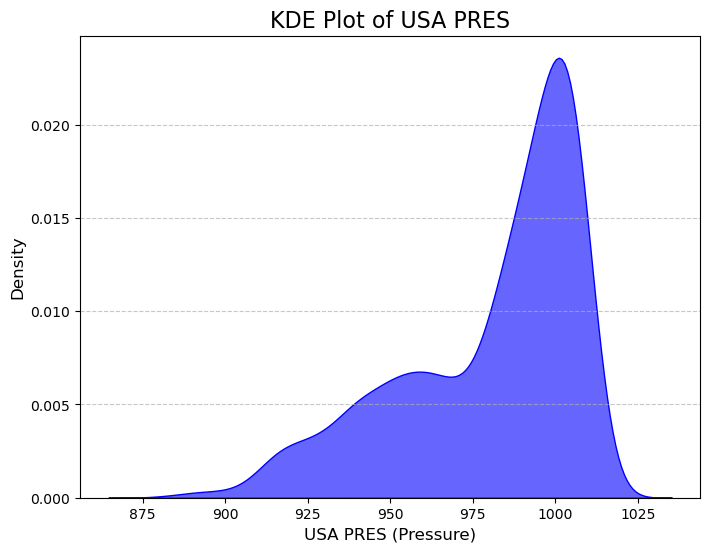

In [4]:
# KDE 2 Pressure
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load 
df = pd.read_csv("GEO557Tropical_Storm_Dataset_CLEAN.csv")

# Plot the KDE for 'USA PRES'
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x="USA PRES", fill=True, color="blue", alpha=0.6)
plt.title("KDE Plot of USA PRES", fontsize=16)
plt.xlabel("USA PRES (Pressure)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [2]:
# SECTION 2: 

# PARAMETRIC and NOn-parametric stats: 

In [1]:
from scipy.stats import ks_2samp
import pandas as pd


data = pd.read_csv("GEO557Tropical_Storm_Dataset_CLEAN.csv")
# Group by 'Name' and 'Year' to get the maximum 'USA WIND' for each hurricane
max_wind_per_hurricane = data.groupby(['Name', 'Year'])['USA WIND'].max().reset_index()

# Split into two time periods
first_half = max_wind_per_hurricane[(max_wind_per_hurricane['Year'] >= 2000) & 
                                    (max_wind_per_hurricane['Year'] <= 2011)]['USA WIND'].dropna()
second_half = max_wind_per_hurricane[(max_wind_per_hurricane['Year'] >= 2012) & 
                                     (max_wind_per_hurricane['Year'] <= 2023)]['USA WIND'].dropna()

# Perform the KS test
ks_statistic, p_value = ks_2samp(first_half, second_half)

# Output results
print(f"KS Statistic: {ks_statistic}")
print(f"P-Value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("The distributions of maximum hurricane winds are significantly different (p < 0.05).")
else:
    print("The distributions of maximum hurricane winds are not significantly different between 2000-2011 and 2012-2023 (p ≥ 0.05).")

KS Statistic: 0.2714285714285714
P-Value: 0.6796359067862635
The distributions of maximum hurricane winds are not significantly different (p ≥ 0.05).


In [15]:
from scipy.stats import ks_2samp
import pandas as pd

# Load data
data = pd.read_csv("GEO557Tropical_Storm_Dataset_CLEAN.csv")

# Group by 'Name' and 'Year' to get the minimum 'USA PRES' for each hurricane
min_pres_per_hurricane = data.groupby(['Name', 'Year'])['USA PRES'].min().reset_index()

# Split into two time periods
first_half = min_pres_per_hurricane[(min_pres_per_hurricane['Year'] >= 2000) & 
                                    (min_pres_per_hurricane['Year'] <= 2011)]['USA PRES'].dropna()
second_half = min_pres_per_hurricane[(min_pres_per_hurricane['Year'] >= 2012) & 
                                     (min_pres_per_hurricane['Year'] <= 2023)]['USA PRES'].dropna()

# Perform the KS test
ks_statistic, p_value = ks_2samp(first_half, second_half)


# Output results
print(f"KS Statistic: {ks_statistic}")
print(f"P-Value: {p_value}")

# Interpret results
if p_value < 0.05:
    print("The distributions of minimum hurricane pressures are significantly different (p < 0.05).")
else:
    print("The distributions of minimum hurricane pressures are not significantly different between 2000-2011 and 2012-2023 (p ≥ 0.05).")

KS Statistic: 0.32857142857142857
P-Value: 0.46748410202441715
The distributions of minimum hurricane pressures are not significantly different between 2000-2011 and 2012-2023 (p ≥ 0.05).


In [29]:
#Build another csv with la nina and el nino for future use. 
dfENSO = pd.read_csv("ENSO_Years.csv") 
# import, get info and head to prove data exists. 
print(dfENSO.info())
dfENSO.head(10)

df2 = pd.read_csv("GEO557Tropical_Storm_Dataset_CLEAN.csv")
#merge ENSO Year Table with the Hurricane Path dataframe
df2 = pd.merge(df2, dfENSO, on='Year')
print(df2)
# Save the merged DataFrame to a new CSV file
df2.to_csv("Tropical_Storm_Dataset_AND_ENSO.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    127 non-null    int64 
 1   ENSO    127 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.1+ KB
None
      Year    Name  BASIN             ISO_TIME NATURE   LAT   LON  WMO WIND  \
0     2022  NICOLE    NaN  2022-11-06 12:00:00     DS  20.6 -66.8      30.0   
1     2022  NICOLE    NaN  2022-11-06 15:00:00     DS  21.5 -66.7       NaN   
2     2022  NICOLE    NaN  2022-11-06 18:00:00     DS  22.4 -66.8      35.0   
3     2022  NICOLE    NaN  2022-11-06 21:00:00     DS  23.2 -67.1       NaN   
4     2022  NICOLE    NaN  2022-11-07 00:00:00     DS  23.9 -67.5      35.0   
...    ...     ...    ...                  ...    ...   ...   ...       ...   
2131  2004    IVAN    NaN  2004-09-23 21:00:00     TS  29.4 -92.9       NaN   
2132  2004    IVAN    NaN  2004-09-24 00:00:00     TS  29.6 -93.2

In [30]:
from scipy.stats import ks_2samp
import pandas as pd

# Load merged dataset
data = pd.read_csv("Tropical_Storm_Dataset_AND_ENSO.csv")

# Group by 'Name' and 'Year' to get the maximum 'USA WIND' for each hurricane
max_wind_per_hurricane = data.groupby(['Name', 'Year'])['USA WIND'].max().reset_index()

# Merge the ENSO phase information back in based on the year
max_wind_per_hurricane = pd.merge(max_wind_per_hurricane, data[['Year', 'ENSO']].drop_duplicates(), on='Year', how='left')

# Filter by ENSO phases
el_nino = max_wind_per_hurricane[max_wind_per_hurricane['ENSO'] == 'El Niño']['USA WIND'].dropna()
la_nina = max_wind_per_hurricane[max_wind_per_hurricane['ENSO'] == 'La Niña']['USA WIND'].dropna()
neutral = max_wind_per_hurricane[max_wind_per_hurricane['ENSO'] == 'Neutral']['USA WIND'].dropna()

# Perform KS test between El Niño and La Niña
ks_statistic_elnino_lanina, p_value_elnino_lanina = ks_2samp(el_nino, la_nina)
print("El Niño vs La Niña:")
print(f"KS Statistic: {ks_statistic_elnino_lanina}")
print(f"P-Value: {p_value_elnino_lanina}")
if p_value_elnino_lanina < 0.05:
    print("Distributions of max USA WIND are significantly different between El Niño and La Niña (p < 0.05).")
else:
    print("Distributions of max USA WIND are not significantly different between El Niño and La Niña (p ≥ 0.05).")

# Perform KS test between El Niño and Neutral
ks_statistic_elnino_neutral, p_value_elnino_neutral = ks_2samp(el_nino, neutral)
print("\nEl Niño vs Neutral:")
print(f"KS Statistic: {ks_statistic_elnino_neutral}")
print(f"P-Value: {p_value_elnino_neutral}")
if p_value_elnino_neutral < 0.05:
    print("Distributions of max USA WIND are significantly different between El Niño and Neutral (p < 0.05).")
else:
    print("Distributions of max USA WIND are not significantly different between El Niño and Neutral (p ≥ 0.05).")

# Perform KS test between La Niña and Neutral
ks_statistic_lanina_neutral, p_value_lanina_neutral = ks_2samp(la_nina, neutral)
print("\nLa Niña vs Neutral:")
print(f"KS Statistic: {ks_statistic_lanina_neutral}")
print(f"P-Value: {p_value_lanina_neutral}")
if p_value_lanina_neutral < 0.05:
    print("Distributions of max USA WIND are significantly different between La Niña and Neutral (p < 0.05).")
else:
    print("Distributions of max USA WIND are not significantly different between La Niña and Neutral (p ≥ 0.05).")


El Niño vs La Niña:
KS Statistic: 0.5
P-Value: 0.9333333333333332
Distributions of max USA WIND are not significantly different between El Niño and La Niña (p ≥ 0.05).

El Niño vs Neutral:
KS Statistic: 0.4411764705882353
P-Value: 0.7894736842105261
Distributions of max USA WIND are not significantly different between El Niño and Neutral (p ≥ 0.05).

La Niña vs Neutral:
KS Statistic: 0.6323529411764706
P-Value: 0.1069340016708438
Distributions of max USA WIND are not significantly different between La Niña and Neutral (p ≥ 0.05).


In [31]:


from scipy.stats import ks_2samp
import pandas as pd

# Load merged dataset
data = pd.read_csv("Tropical_Storm_Dataset_AND_ENSO.csv")

# Count the number of storms per year
storm_counts_per_year = data.groupby(['Year', 'ENSO'])['Name'].nunique().reset_index(name='Storm_Count')

# Filter storm counts by ENSO phase
el_nino_counts = storm_counts_per_year[storm_counts_per_year['ENSO'] == 'El Niño']['Storm_Count']
la_nina_counts = storm_counts_per_year[storm_counts_per_year['ENSO'] == 'La Niña']['Storm_Count']
neutral_counts = storm_counts_per_year[storm_counts_per_year['ENSO'] == 'Neutral']['Storm_Count']

# Perform KS test between El Niño and La Niña storm counts
ks_statistic_elnino_lanina, p_value_elnino_lanina = ks_2samp(el_nino_counts, la_nina_counts)
print("El Niño vs La Niña (Number of Storms per Year):")
print(f"KS Statistic: {ks_statistic_elnino_lanina}")
print(f"P-Value: {p_value_elnino_lanina}")
if p_value_elnino_lanina < 0.05:
    print("Distributions of storm counts per year are significantly different between El Niño and La Niña (p < 0.05).")
else:
    print("Distributions of storm counts per year are not significantly different between El Niño and La Niña (p ≥ 0.05).")

# Perform KS test between El Niño and Neutral storm counts
ks_statistic_elnino_neutral, p_value_elnino_neutral = ks_2samp(el_nino_counts, neutral_counts)
print("\nEl Niño vs Neutral (Number of Storms per Year):")
print(f"KS Statistic: {ks_statistic_elnino_neutral}")
print(f"P-Value: {p_value_elnino_neutral}")
if p_value_elnino_neutral < 0.05:
    print("Distributions of storm counts per year are significantly different between El Niño and Neutral (p < 0.05).")
else:
    print("Distributions of storm counts per year are not significantly different between El Niño and Neutral (p ≥ 0.05).")

# Perform KS test between La Niña and Neutral storm counts
ks_statistic_lanina_neutral, p_value_lanina_neutral = ks_2samp(la_nina_counts, neutral_counts)
print("\nLa Niña vs Neutral (Number of Storms per Year):")
print(f"KS Statistic: {ks_statistic_lanina_neutral}")
print(f"P-Value: {p_value_lanina_neutral}")
if p_value_lanina_neutral < 0.05:
    print("Distributions of storm counts per year are significantly different between La Niña and Neutral (p < 0.05).")
else:
    print("Distributions of storm counts per year are not significantly different between La Niña and Neutral (p ≥ 0.05).")



El Niño vs La Niña (Number of Storms per Year):
KS Statistic: 0.6666666666666666
P-Value: 1.0
Distributions of storm counts per year are not significantly different between El Niño and La Niña (p ≥ 0.05).

El Niño vs Neutral (Number of Storms per Year):
KS Statistic: 0.42857142857142855
P-Value: 1.0
Distributions of storm counts per year are not significantly different between El Niño and Neutral (p ≥ 0.05).

La Niña vs Neutral (Number of Storms per Year):
KS Statistic: 0.42857142857142855
P-Value: 0.7000000000000001
Distributions of storm counts per year are not significantly different between La Niña and Neutral (p ≥ 0.05).
